In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tomato-diseases-dataset-csvimages/train.csv
/kaggle/input/tomato-diseases-dataset-csvimages/Tomato_images/Tomato_images/0ade19e4-c48b-4e58-bddf-153d44d48c3e___Com.G_SpM_FL 9449.JPG
/kaggle/input/tomato-diseases-dataset-csvimages/Tomato_images/Tomato_images/d08a1c48-3360-40e3-9c3d-e47c2812bed2___UF.GRC_YLCV_Lab 01920.JPG
/kaggle/input/tomato-diseases-dataset-csvimages/Tomato_images/Tomato_images/4a1e2b71-992a-4a64-a599-b49b8fa75378___RS_HL 0627.JPG
/kaggle/input/tomato-diseases-dataset-csvimages/Tomato_images/Tomato_images/d9d2d7ca-3301-4174-aec5-b4578682b0d9___Com.G_TgS_FL 8181.JPG
/kaggle/input/tomato-diseases-dataset-csvimages/Tomato_images/Tomato_images/cf8c6e28-201c-4c8e-994f-8dcf98362e64___RS_Erly.B 7651.JPG
/kaggle/input/tomato-diseases-dataset-csvimages/Tomato_images/Tomato_images/c38d09ad-afb9-4f8e-86cd-990dec5d6dbb___YLCV_GCREC 2734.JPG
/kaggle/input/tomato-diseases-dataset-csvimages/Tomato_images/Tomato_images/a129e8eb-e2b4-4a8a-a509-f6625da6b11c___GCREC_Bact.Sp

In [29]:
# library importation
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import pathlib

In [30]:
# loading labels (cvs file)
dataset = pd.read_csv('/kaggle/input/tomato-diseases-dataset-csvimages/train.csv')
dataset.head()

Unnamed: 0                                               path  \
0           0  ../input/plantvillage-dataset/color/Tomato___L...   
1           1  ../input/plantvillage-dataset/color/Tomato___L...   
2           2  ../input/plantvillage-dataset/color/Tomato___L...   
3           3  ../input/plantvillage-dataset/color/Tomato___L...   
4           4  ../input/plantvillage-dataset/color/Tomato___L...   

                                                 img            label_text  \
0  781e93a9-2059-42de-8075-658033a6abf7___RS_Late...  Tomato___Late_blight   
1  283ff0be-6e5e-4b4e-bf21-639780b77ffc___GHLB2 L...  Tomato___Late_blight   
2  0db85707-41f9-42df-ba3b-842d14f00a68___GHLB2 L...  Tomato___Late_blight   
3  078a999d-6e6f-427e-a1e6-80b4d2df2bae___GHLB2 L...  Tomato___Late_blight   
4  3dcee9ed-43bb-45a9-8cff-641b3dd62179___RS_Late...  Tomato___Late_blight   

   label  
0      2  
1      2  
2      2  
3      2  
4      2

**Exploring data**

In [107]:
d = dataset.label_text.astype('category')

In [110]:
d.cat.codes.unique()

array([2, 9, 1, 4, 7, 0, 6, 8, 3, 5], dtype=int8)

In [115]:
label_converter = dict(zip(d.cat.codes.unique(), dataset.label_text.unique()))
label_converter

{2: 'Tomato___Late_blight',
 9: 'Tomato___healthy',
 1: 'Tomato___Early_blight',
 4: 'Tomato___Septoria_leaf_spot',
 7: 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 0: 'Tomato___Bacterial_spot',
 6: 'Tomato___Target_Spot',
 8: 'Tomato___Tomato_mosaic_virus',
 3: 'Tomato___Leaf_Mold',
 5: 'Tomato___Spider_mites Two-spotted_spider_mite'}

In [111]:
dataset.label.unique()

array([2, 9, 1, 4, 7, 0, 6, 8, 3, 5])

In [31]:
dataset.img[0]

'781e93a9-2059-42de-8075-658033a6abf7___RS_Late.B 6075.JPG'

In [33]:
dataset.label_text.unique()

array(['Tomato___Late_blight', 'Tomato___healthy',
       'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot',
       'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
       'Tomato___Bacterial_spot', 'Tomato___Target_Spot',
       'Tomato___Tomato_mosaic_virus', 'Tomato___Leaf_Mold',
       'Tomato___Spider_mites Two-spotted_spider_mite'], dtype=object)

In [6]:
dataset.label.unique()

array([2, 9, 1, 4, 7, 0, 6, 8, 3, 5])

In [6]:
print('Class Count : ', len(dataset.label.unique()))

Class Count :  10


In [7]:
dataset.label.value_counts()

label
7    5357
0    2127
2    1909
4    1771
5    1676
9    1591
6    1404
1    1000
3     952
8     373
Name: count, dtype: int64

In [8]:
dataset.label.value_counts().sum()

18160

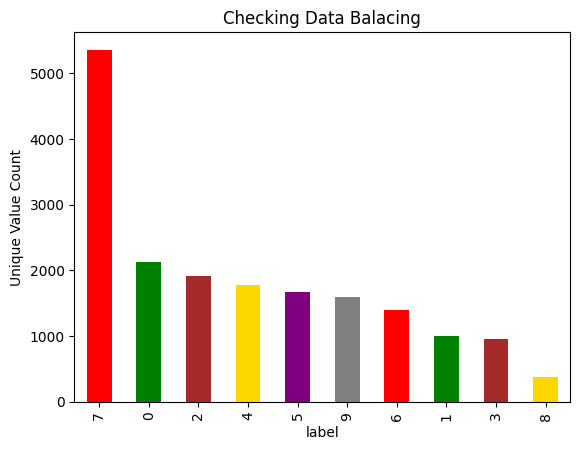

In [12]:
dataset.label.value_counts().plot(kind='bar', color=['r', 'g', 'brown', 'gold', 'purple', 'gray'])
plt.ylabel('Unique Value Count')
plt.title('Checking Data Balacing')
plt.show()

**Image visualization and Loading Actual Image**

In [34]:
# creating root path
import os 
import PIL 
import cv2 as cv

root_url = '/kaggle/input/tomato-diseases-dataset-csvimages/Tomato_images/Tomato_images' 

img_path = os.path.join(root_url, dataset.img[0])
img_path

'/kaggle/input/tomato-diseases-dataset-csvimages/Tomato_images/Tomato_images/781e93a9-2059-42de-8075-658033a6abf7___RS_Late.B 6075.JPG'

In [35]:
root_url = '/kaggle/input/tomato-diseases-dataset-csvimages/Tomato_images/Tomato_images' 

sample_image = os.path.join(root_url, dataset.img[0])

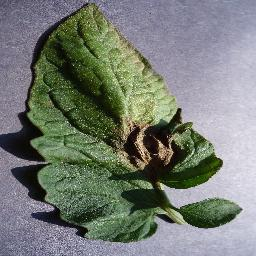

In [71]:
PIL.Image.open(sample_image)

In [73]:
def image_samples(label_class, sample_count):
    random_sample = dataset[['img', 'label', 'label_text']][dataset.label == 2].sample(3)

In [74]:
random_sample = dataset[['img', 'label', 'label_text']][dataset.label == 2].sample(3)
for val in random_sample.values: 
    print(val)

['e114b022-a00f-4055-9ff0-ae67c6722607___RS_Late.B 5024.JPG' 2
 'Tomato___Late_blight']
['a5fe1111-38b0-4206-9ac7-3eec701beb79___GHLB2 Leaf 8868.JPG' 2
 'Tomato___Late_blight']
['d1f8e85b-aa57-460d-8ea2-90ceb345478c___GHLB Leaf 2.7 Day 12.JPG' 2
 'Tomato___Late_blight']


In [14]:
def plot_random_image_from_specific_class(class_id=0, sample_count=2):
    random_sample = dataset[['img', 'label', 'label_text']][dataset.label == class_id].sample(sample_count)
    
    fig, axs = plt.subplots(1, sample_count)
    for col, val in zip(range(len(axs)) , random_sample.values): 
        img = os.path.join(root_url, val[0])
        axs[col].imshow(cv.imread(img))
        axs[col].set_title(val[2])
        plt.tight_layout()

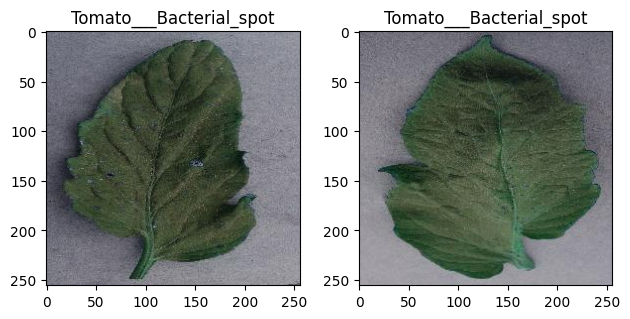

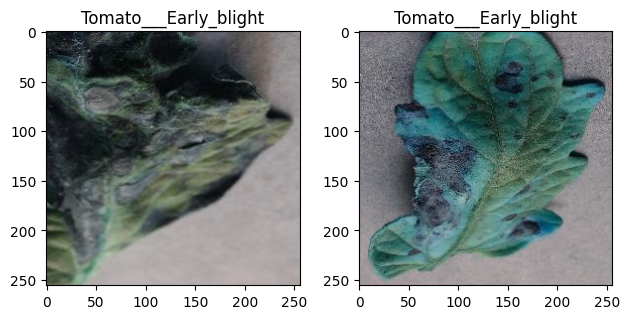

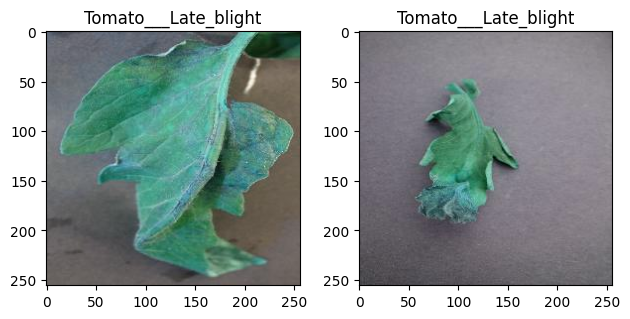

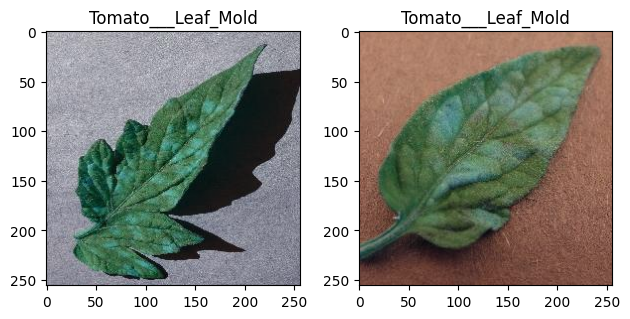

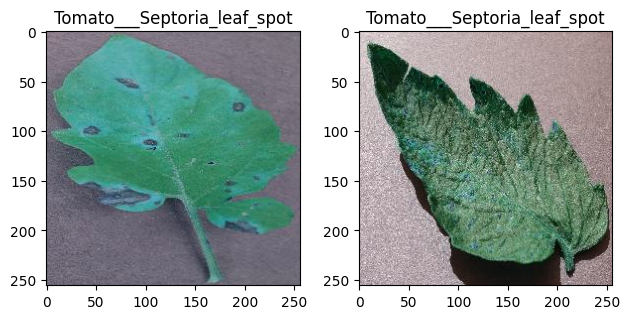

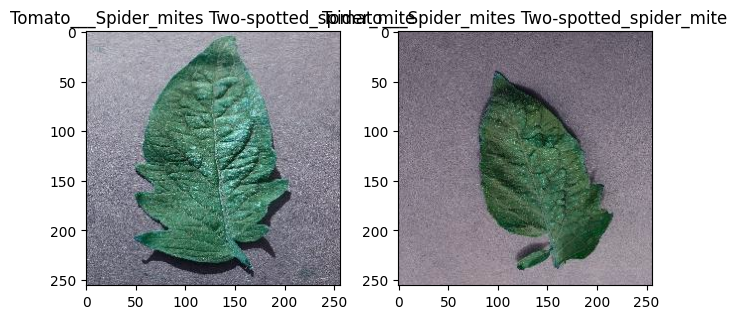

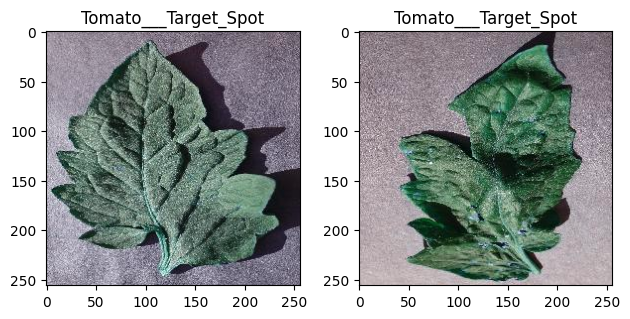

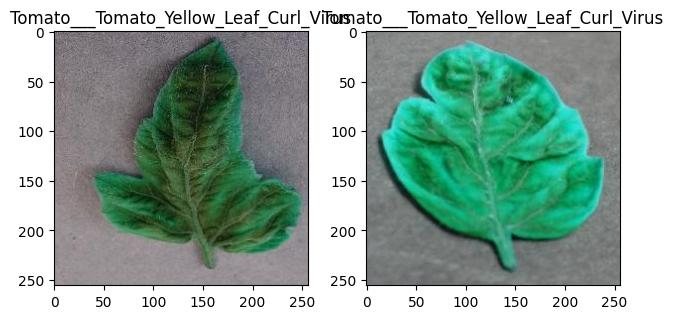

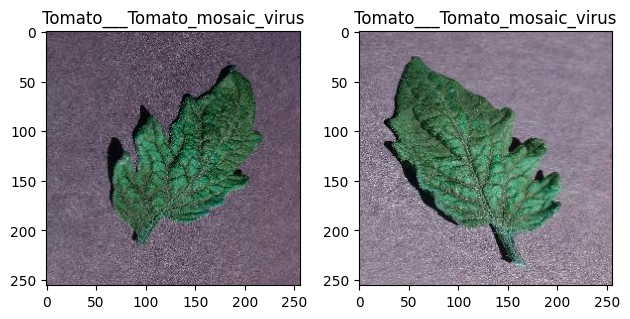

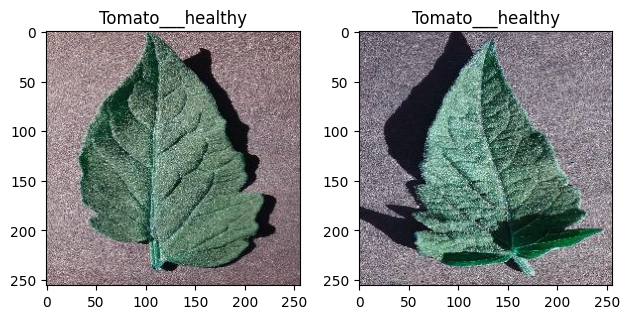

In [15]:
for index in range(10): 
    plot_random_image_from_specific_class(index)


In [36]:
# loading image data in numpy format... 
X = []
y= []

# looping through path and also geting labels.. 
for data in  dataset[['img', 'label']].values:
    X.append( cv.resize(cv.imread(os.path.join(root_url, data[0])), (80, 80) , cv.INTER_AREA) )
    y.append(data[1])
    
print('Image Loading complete....')

Image Loading complete....


In [37]:
# converting to numpy
X = np.array(X) / 255
y = np.array(y)
 

In [38]:
# shuffle data and split data into training and testing data
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, shuffle=True)
X_test.shape

(4540, 80, 80, 3)

In [39]:
print('Training Sample size', X_train.shape)

Training Sample size (13620, 80, 80, 3)


In [40]:
print('Testing Sample size', X_test.shape)

Testing Sample size (4540, 80, 80, 3)


In [41]:
y_test[:]

array([5, 3, 9, ..., 9, 2, 2])

In [42]:
import tensorflow as tf 
from tensorflow import keras

**CNN Architecture**

In [51]:
cnn_model  = tf.keras.Sequential([
    # input 
    keras.layers.Input(shape=(80,80,3)),
    
   # cnn
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    
   #dense
    keras.layers.Flatten(), 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    
])


cnn_model.compile(
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'], 
    optimizer='adam'
)

In [52]:
cnn_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 78, 78, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 39, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 37, 37, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     2,654,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,675,018 (10.20 MB)

 Trainable params: 2,675,018 (10.20 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
cnn_history_10 = cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
426/426 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.5247 - loss: 1.4158 - val_accuracy: 0.7960 - val_loss: 0.6242
Epoch 2/10
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8427 - loss: 0.4575 - val_accuracy: 0.8315 - val_loss: 0.5085
Epoch 3/10
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9023 - loss: 0.2865 - val_accuracy: 0.8923 - val_loss: 0.3382
Epoch 4/10
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9381 - loss: 0.1890 - val_accuracy: 0.8733 - val_loss: 0.4038
Epoch 5/10
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9527 - loss: 0.1472 - val_accuracy: 0.8720 - val_loss: 0.4020
Epoch 6/10
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9676 - loss: 0.0974 - val_accuracy: 0.9187 - val_loss: 0.2662
Epoch 7/10
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9808 - loss: 0.0598 - val_accuracy: 0.9233 - val_loss: 0.2743
Epoch 8/10
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9894 - loss: 0.0354 - val_accuracy: 0

In [49]:
cnn_history_20 = cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.5792 - loss: 1.2378 - val_accuracy: 0.8040 - val_loss: 0.5439
Epoch 2/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8659 - loss: 0.3965 - val_accuracy: 0.8839 - val_loss: 0.3453
Epoch 3/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9124 - loss: 0.2557 - val_accuracy: 0.9070 - val_loss: 0.2938
Epoch 4/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9451 - loss: 0.1715 - val_accuracy: 0.9143 - val_loss: 0.2801
Epoch 5/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9560 - loss: 0.1323 - val_accuracy: 0.9148 - val_loss: 0.2769
Epoch 6/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9682 - loss: 0.0925 - val_accuracy: 0.9297 - val_loss: 0.2423
Epoch 7/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9861 - loss: 0.0471 - val_accuracy: 0.8826 - val_loss: 0.4307
Epoch 8/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9724 - loss: 0.0739 - val_accuracy: 0

In [53]:
cnn_history_50 = cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.5413 - loss: 1.3335 - val_accuracy: 0.8148 - val_loss: 0.5215
Epoch 2/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8531 - loss: 0.4264 - val_accuracy: 0.8709 - val_loss: 0.4064
Epoch 3/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9016 - loss: 0.2852 - val_accuracy: 0.8976 - val_loss: 0.3054
Epoch 4/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9407 - loss: 0.1876 - val_accuracy: 0.9059 - val_loss: 0.2997
Epoch 5/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9487 - loss: 0.1515 - val_accuracy: 0.9081 - val_loss: 0.2800
Epoch 6/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9671 - loss: 0.1024 - val_accuracy: 0.9068 - val_loss: 0.3065
Epoch 7/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9736 - loss: 0.0774 - val_accuracy: 0.9154 - val_loss: 0.2858
Epoch 8/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9772 - loss: 0.0683 - val_accuracy: 0

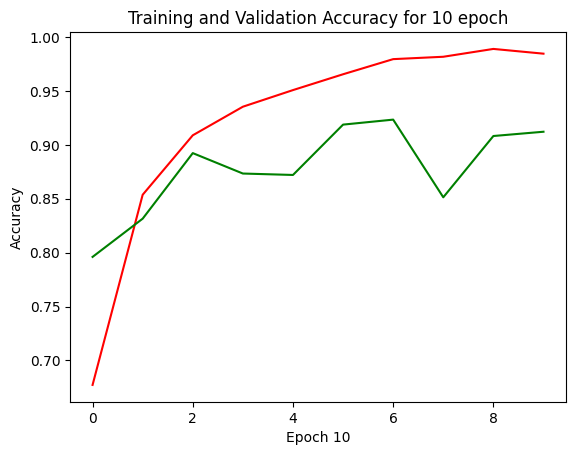

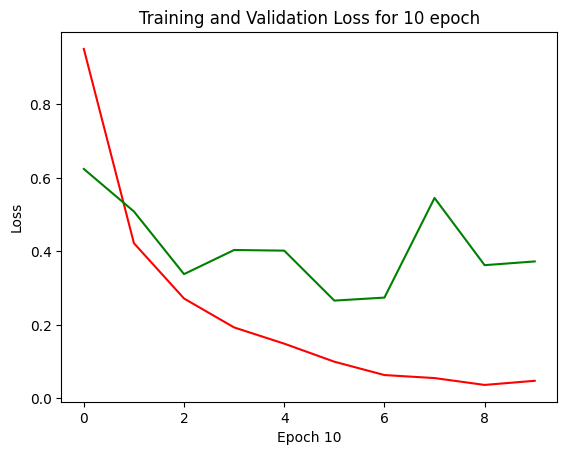

In [59]:
acc = cnn_history_10.history['accuracy']
val_acc = cnn_history_10.history['val_accuracy']
loss = cnn_history_10.history['loss']
val_loss = cnn_history_10.history['val_loss']

plt.plot(acc, color='r')
plt.plot(val_acc, color='green')
plt.title('Training and Validation Accuracy for 10 epoch')
plt.xlabel('Epoch 10')
plt.ylabel('Accuracy')
plt.show()


plt.plot(loss, color='r')
plt.plot(val_loss, color='green')
plt.title('Training and Validation Loss for 10 epoch')
plt.xlabel('Epoch 10')
plt.ylabel('Loss')
plt.show()

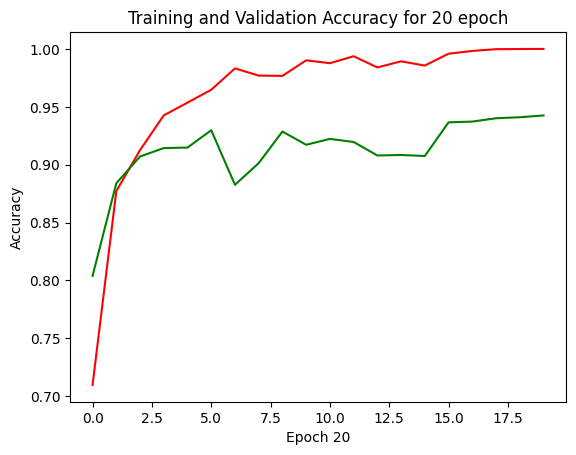

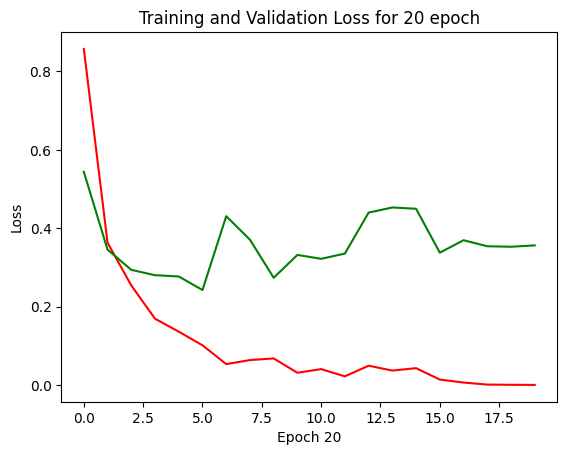

In [60]:
acc = cnn_history_20.history['accuracy']
val_acc = cnn_history_20.history['val_accuracy']
loss = cnn_history_20.history['loss']
val_loss = cnn_history_20.history['val_loss']

plt.plot(acc, color='r')
plt.plot(val_acc, color='green')
plt.title('Training and Validation Accuracy for 20 epoch')
plt.xlabel('Epoch 20')
plt.ylabel('Accuracy')
plt.show()


plt.plot(loss, color='r')
plt.plot(val_loss, color='green')
plt.title('Training and Validation Loss for 20 epoch')
plt.xlabel('Epoch 20')
plt.ylabel('Loss')
plt.show()

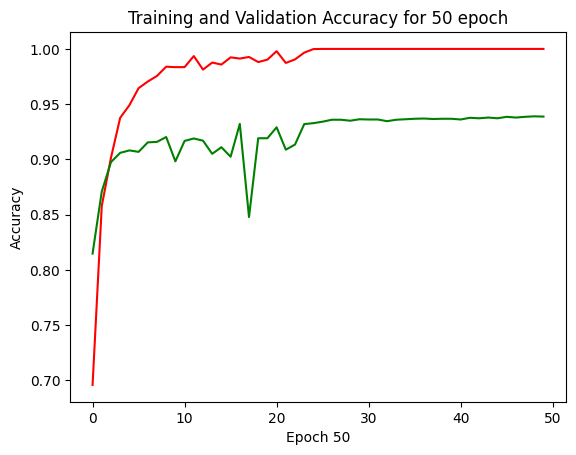

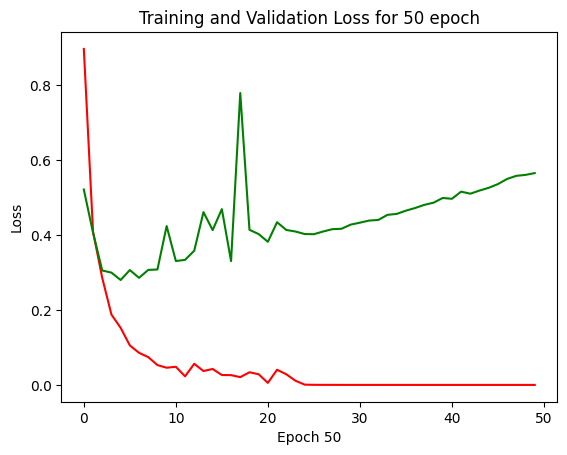

In [61]:
acc = cnn_history_50.history['accuracy']
val_acc = cnn_history_50.history['val_accuracy']
loss = cnn_history_50.history['loss']
val_loss = cnn_history_50.history['val_loss']

plt.plot(acc, color='r')
plt.plot(val_acc, color='green')
plt.title('Training and Validation Accuracy for 50 epoch')
plt.xlabel('Epoch 50')
plt.ylabel('Accuracy')
plt.show()


plt.plot(loss, color='r')
plt.plot(val_loss, color='green')
plt.title('Training and Validation Loss for 50 epoch')
plt.xlabel('Epoch 50')
plt.ylabel('Loss')
plt.show()

In [76]:
acc1 = cnn_history_10.history['accuracy'][-1]
acc2 = cnn_history_20.history['accuracy'][-1]
acc3 = cnn_history_20.history['accuracy'][-1]

valacc1 = cnn_history_10.history['val_accuracy'][-1]
valacc2 = cnn_history_20.history['val_accuracy'][-1]
valacc3 =cnn_history_20.history['val_accuracy'][-1]

loss1 = cnn_history_10.history['loss'][-1]
loss2 = cnn_history_20.history['loss'][-1]
loss3 = cnn_history_20.history['loss'][-1]

valloss1 = cnn_history_10.history['val_loss'][-1]
valloss2 = cnn_history_20.history['val_loss'][-1]
valloss3 =cnn_history_20.history['val_loss'][-1]


table_data = {'epoch': [10, 20, 50] , 
             'Training Accuracy': [acc1, acc2, acc3], 
             'Training Loss': [loss1, loss2, loss3], 
              'Validation Accuracy': [valacc1, valacc2, valacc3], 
             'Validation Loss': [valloss1, valloss2, valloss3], 
             }

table_data = pd.DataFrame(table_data)
table_data

epoch  Training Accuracy  Training Loss  Validation Accuracy  \
0     10           0.984508       0.048047             0.912115   
1     20           1.000000       0.000204             0.942511   
2     50           1.000000       0.000204             0.942511   

   Validation Loss  
0         0.372688  
1         0.356216  
2         0.356216

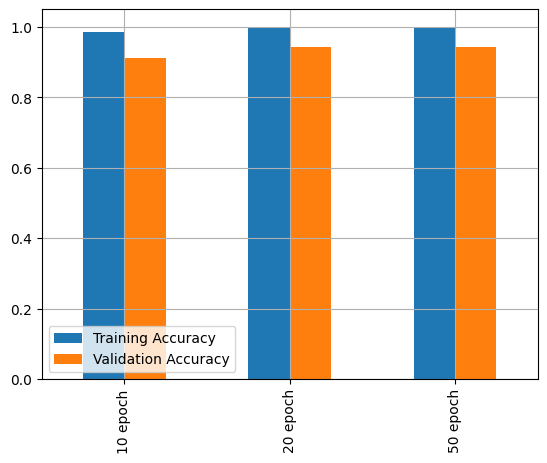

In [91]:
table_data[['Training Accuracy', 'Validation Accuracy']].plot(kind='bar')
plt.xticks(ticks=[0,1,2], labels=['10 epoch', '20 epoch', '50 epoch'])
plt.grid()
plt.legend(loc='lower left')
plt.show()


In [92]:
# saveing model for local usage 
cnn_model.save('tomato_prediction_model.h5')
print('model saved successfully....')

model saved successfully....


In [133]:
sample_image = np.expand_dims(X_test[30], axis=0)
sample_image

array([[[[0.42352941, 0.44313725, 0.52156863],
         [0.38431373, 0.40392157, 0.48627451],
         [0.39215686, 0.41176471, 0.49411765],
         ...,
         [0.41568627, 0.44313725, 0.51764706],
         [0.43137255, 0.45882353, 0.53333333],
         [0.43529412, 0.45882353, 0.53333333]],

        [[0.42352941, 0.44313725, 0.5254902 ],
         [0.44705882, 0.46666667, 0.54901961],
         [0.44313725, 0.4627451 , 0.54509804],
         ...,
         [0.44313725, 0.47058824, 0.54509804],
         [0.42352941, 0.45098039, 0.5254902 ],
         [0.45098039, 0.47843137, 0.55294118]],

        [[0.40784314, 0.42745098, 0.50980392],
         [0.42745098, 0.44705882, 0.52941176],
         [0.37647059, 0.39607843, 0.47843137],
         ...,
         [0.4627451 , 0.49019608, 0.56470588],
         [0.40784314, 0.43529412, 0.50980392],
         [0.44313725, 0.47058824, 0.54509804]],

        ...,

        [[0.64313725, 0.65098039, 0.72156863],
         [0.63921569, 0.64705882, 0.71764706]

In [152]:
# design a prediction model.... 
import cv2 as cv
import os

root_url = '/kaggle/input/tomato-diseases-dataset-csvimages/Tomato_images/Tomato_images' 
img_path = os.path.join(root_url, dataset.img[100])
img_path

def prediction_function(img_path): 
    
    #preprocess image, convert to 80 by 80 
    sample_image = cv.resize(cv.imread(img_path), (80, 80))
    
    sample_image = np.expand_dims(sample_image, axis=0)
    print(sample_image.shape)
    prediction = cnn_model.predict(sample_image)
    output = np.argmax(prediction)
    print('Confidence : ', prediction[0][output] * 100 , '%')
    print(output)
    return label_converter[output]


In [153]:
prediction_function(img_path)

(1, 80, 80, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Confidence :  100.0
2


'Tomato___Late_blight'

In [155]:
mm = tf.keras.models.load_model('tomato_prediction_model.h5')
mm.compile(
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'], 
    optimizer='adam'
)

mm.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 78, 78, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 39, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 37, 37, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     2,654,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,675,018 (10.20 MB)

 Trainable params: 2,675,018 (10.20 MB)

 Non-trainable params: 0 (0.00 B)